Impoort the required data libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import os
from google.colab import files
import pywt


In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model

from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import History 

In [ ]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import History 
from tensorflow.keras.layers import Dropout


Connect with google drive to extract the pre-processed datasets

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Import the Training and Test files 

In [ ]:
df_X_train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/X_train_full_samp.csv')
df_X_valid = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/X_valid_full_samp.csv')

In [ ]:
df_X_train

,Unnamed: 0,c0,c1,c2,c3,c4,c5,c6,c7,c8,...,c711,c712,c713,c714,c715,c716,c717,c718,c719,c720
0,38710,1.0,-0.020,-0.015,0.005,-0.005,-0.005,0.005,0.020,0.020,...,-0.060,-0.050,-0.050,-0.040,-0.040,-0.050,-0.050,-0.060,-0.055,-0.035
1,22672,0.0,-0.950,-0.955,-0.980,-1.000,-1.015,-1.025,-1.020,-1.020,...,-0.830,-0.835,-0.850,-0.850,-0.865,-0.865,-0.860,-0.850,-0.845,-0.850
2,9844,0.0,-0.335,-0.350,-0.360,-0.365,-0.365,-0.345,-0.320,-0.320,...,-0.170,-0.175,-0.175,-0.185,-0.160,-0.165,-0.170,-0.170,-0.175,-0.165
3,45594,1.0,-0.560,-0.590,-0.610,-0.650,-0.675,-0.680,-0.700,-0.695,...,-0.900,-0.925,-0.940,-0.945,-0.950,-0.945,-0.940,-0.940,-0.935,-0.945
4,45688,1.0,-0.665,-0.660,-0.695,-0.730,-0.730,-0.715,-0.700,-0.650,...,-1.060,-1.065,-1.080,-1.090,-1.100,-1.120,-1.115,-1.100,-1.100,-1.095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8258,20163,0.0,0.025,0.015,-0.020,-0.035,-0.050,-0.050,-0.070,-0.075,...,0.025,0.010,-0.005,0.000,0.005,-0.005,0.000,-0.025,-0.030,-0.020
8259,32294,0.0,-2.055,-2.025,-1.970,-1.940,-1.885,-1.855,-1.795,-1.740,...,-0.950,-0.950,-0.970,-0.970,-0.985,-0.990,-0.985,-0.990,-0.950,-0.970
8260,55501,1.0,-0.380,-0.360,-0.355,-0.370,-0.355,-0.350,-0.330,-0.350,...,-0.190,-0.185,-0.180,-0.190,-0.170,-0.145,-0.135,-0.120,-0.100,-0.075
8261,80827,0.0,-1.120,-1.115,-1.110,-1.100,-1.085,-1.060,-1.030,-0.985,...,-0.010,-0.005,0.005,0.020,0.015,0.015,0.010,0.015,0.010,0.015


In [ ]:
#Check shape of the two data frames
df_X_train.shape, df_X_valid.shape

((8263, 722), (2671, 722))

In [ ]:
#Drop the 'Unnamed: 0' columsn from the dataframes
df_X_train = df_X_train.drop(['Unnamed: 0'], axis=1)
df_X_valid = df_X_valid.drop(['Unnamed: 0'], axis=1)


In [ ]:
#Get the lable values (y values)

train_labels = df_X_train.values[:, 0]
test_labels = df_X_valid.values[:, 0]

train_labels.shape,test_labels.shape

((8263,), (2671,))

In [ ]:
#Get the predictor values (X values)
train_data =  df_X_train.values[:, 1:]
test_data=  df_X_valid.values[:, 1:]


train_data.shape, test_data.shape

((8263, 720), (2671, 720))

In [ ]:
train_data

array([[-0.02 , -0.015,  0.005, ..., -0.06 , -0.055, -0.035],
       [-0.95 , -0.955, -0.98 , ..., -0.85 , -0.845, -0.85 ],
       [-0.335, -0.35 , -0.36 , ..., -0.17 , -0.175, -0.165],
       ...,
       [-0.38 , -0.36 , -0.355, ..., -0.12 , -0.1  , -0.075],
       [-1.12 , -1.115, -1.11 , ...,  0.015,  0.01 ,  0.015],
       [-0.37 , -0.42 , -0.395, ...,  0.08 ,  0.055,  0.05 ]])

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((8263, 720), (8263,), (2671, 720), (2671,))

In [ ]:
train_data_ab = train_data.reshape(8263, 720,1)
train_data_ab.shape

(8263, 720, 1)

In [ ]:
test_data_ab = test_data.reshape(2671,720,1)
test_data_ab.shape

(2671, 720, 1)

In [ ]:
train_labels_ab = train_labels.reshape(8263,1)
test_labels_ab = test_labels.reshape(2671,1)
train_labels_ab.shape, test_labels_ab.shape

((8263, 1), (2671, 1))

In [ ]:
import pywt

In [ ]:
scales = range(1,128)
waveletname = 'mexh'
train_size = 8263
test_size= 2671
train_data_cwt = np.ndarray(shape=(train_size, 127, 127, 1))

In [ ]:
train_data_cwt = np.ndarray(shape=(train_size, 127, 127))
for ii in range(0,train_size):
        signal = train_data[ii, :]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        coeff_ = coeff[:,:127]
        train_data_cwt[ii, :, :] = coeff_


x_train_ab = train_data_cwt



In [ ]:
x_train_ab.shape

(8263, 127, 127)

In [ ]:
x_train = x_train_ab.reshape(8263, 127,127,1)
x_train.shape

(8263, 127, 127, 1)

In [ ]:
test_data_cwt = np.ndarray(shape=(test_size, 127, 127))
for ii in range(0,test_size):
        signal = test_data[ii, :]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        coeff_ = coeff[:,:127]
        test_data_cwt[ii, :, :] = coeff_


x_test_ab = test_data_cwt

In [ ]:
x_test_ab.shape

(2671, 127, 127)

In [ ]:
x_test = x_test_ab.reshape(2671, 127,127,1)
x_test.shape

(2671, 127, 127, 1)

In [ ]:

y_train = train_labels.reshape(8263,1)
y_test = test_labels.reshape(2671,1)

In [ ]:
x_train.shape, y_train.shape

((8263, 127, 127, 1), (8263, 1))

In [ ]:
x_test.shape, y_test.shape

((2671, 127, 127, 1), (2671, 1))

In [ ]:
input_shape = (127, 127, 1)
batch_size = 16
num_classes = 1
epochs = 10
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)
 
 
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
#model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (10, 10), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 125, 125, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 53, 53, 64)        204864    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 43264)             0         
                                                                 
 dense_2 (Dense)             (None, 1000)             

In [ ]:

input_shape = (127, 127, 1)
batch_size = 64
num_classes = 1
epochs = 10
 
 
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(Dropout(0.8))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.8))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))
 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
 
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
 
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(test_score[0], test_score[1]))

Epoch 1/10
130/130 [==============================] - 3s 20ms/step - loss: 1.7747 - accuracy: 0.6696 - val_loss: 0.6776 - val_accuracy: 0.6724
Epoch 2/10
130/130 [==============================] - 2s 17ms/step - loss: 0.6667 - accuracy: 0.6939 - val_loss: 0.6631 - val_accuracy: 0.6724
Epoch 3/10
130/130 [==============================] - 2s 18ms/step - loss: 0.6523 - accuracy: 0.6939 - val_loss: 0.6526 - val_accuracy: 0.6724
Epoch 4/10
130/130 [==============================] - 3s 20ms/step - loss: 0.6413 - accuracy: 0.6939 - val_loss: 0.6450 - val_accuracy: 0.6724
Epoch 5/10
130/130 [==============================] - 2s 19ms/step - loss: 0.6333 - accuracy: 0.6939 - val_loss: 0.6399 - val_accuracy: 0.6724
Epoch 6/10
130/130 [==============================] - 2s 17ms/step - loss: 0.6275 - accuracy: 0.6939 - val_loss: 0.6365 - val_accuracy: 0.6724
Epoch 7/10
130/130 [==============================] - 2s 19ms/step - loss: 0.6234 - accuracy: 0.6939 - val_loss: 0.6344 - val_accuracy: 0.6724

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


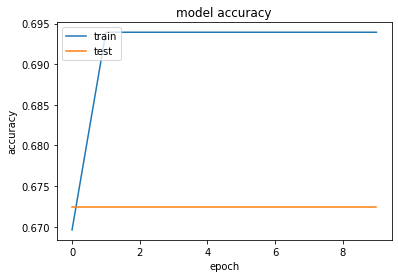

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

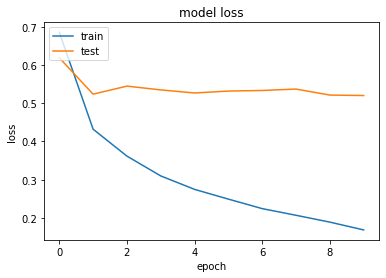

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [ ]:

# predict probabilities for test set
yhat_probs = model.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes = (model.predict(x_test) > 0.5).astype("int32")

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.698989
Precision: 0.581609
Recall: 0.289143
F1 score: 0.386260


In [ ]:
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Cohens kappa: 0.215605
ROC AUC: 0.690560
[[1614  182]
 [ 622  253]]


In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [False, True])

cm_display.plot()
plt.show()